In [1]:
using Random
using LinearAlgebra
using Plots
using LaTeXStrings
pyplot()



Plots.PyPlotBackend()

In [2]:
# generate random data matrix
Random.seed!(0)
n,d = 6,4
X = randn(n,d)

# optional: give it linearly dependent columns
# X[:,3] = X[:,2]

6×4 Array{Float64,2}:
  0.679107   0.0649475   0.397482   2.27623  
  0.828413  -0.109017    0.81163    0.219693 
 -0.353007  -0.51421    -0.346355  -0.117138 
 -0.134854   1.57433    -0.187573  -0.601254 
  0.586617  -0.688907   -1.60726    1.14228  
  0.297336  -0.762804   -2.48079   -0.0886163

In [3]:
# form data from noisy linear model
w♮ = randn(d)
y = X*w♮ + .1*randn(n);

In [4]:
# look at least squares objective as a function of w
f(w) = norm(y - X*w)^2
∇f(w) = 2X'*X*w - 2X'*y

∇f (generic function with 1 method)

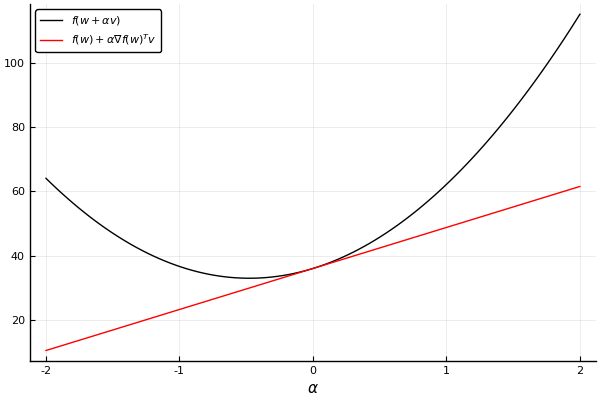

In [5]:
# gradient at w approximates f(w) near w
w = randn(d)
v = randn(d)
alphas = LinRange(-2,2,100)
plot(alphas, [f(w + alpha*v) for alpha in alphas], color=:black, label=L"f(w + \alpha v)")
plot!(alphas, [f(w) + alpha*dot(∇f(w), v) for alpha in alphas], color=:red, label=L"f(w) + \alpha \nabla f(w)^T v")
xlabel!(L"\alpha")


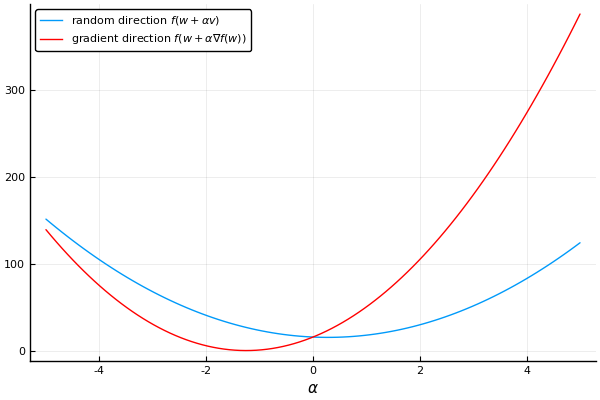

In [6]:
# function decreases fastest in the -∇f(w) direction
w = randn(d)
v = randn(d)
v_normalized = v/norm(v)
g = ∇f(w)
∇f_normalized = g/norm(g)
alphas = LinRange(-5,5,100)
plot(alphas, [f(w + alpha*v_normalized) for alpha in alphas], label = L"random direction $f(w + \alpha v)$")
plot!(alphas, [f(w + alpha*∇f_normalized) for alpha in alphas],color=:red, label= L"gradient direction $f(w + \alpha \nabla f(w))$")
xlabel!(L"\alpha")

# notice: compared to blue line, red line always goes down faster to the left and up faster to the right

# gradient descent

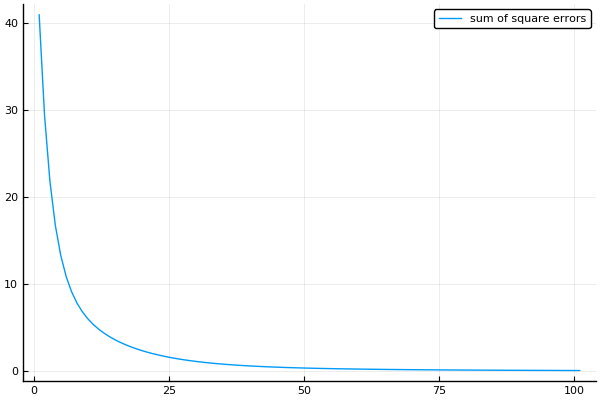

In [7]:
"""This function implements gradient descent for the function f with gradient ∇f"""
function gradient_descent(f, ∇f;
            alpha = .01,      # small constant step size - try other values!
            w = randn(d),     # start at a random w
            maxiters = 100    # maximum number of iterations 
            )
    fks = Float64[]  # a list to record all the values f(w) we see
    push!(fks, f(w)) # record the initial value

    # start descending!
    for k=1:maxiters
        w -= alpha*∇f(w) # take a gradient step
        push!(fks, f(w))             # record its value
    end
    return w, fks
end

w, fks = gradient_descent(f, ∇f, alpha = .01)

plot(fks, label="sum of square errors")
# plot(fks, label="sum of square errors", yscale = :log10)
# plot(fks, label="sum of square errors", yscale = :log10, xscale = :log10)

# Armijo rule

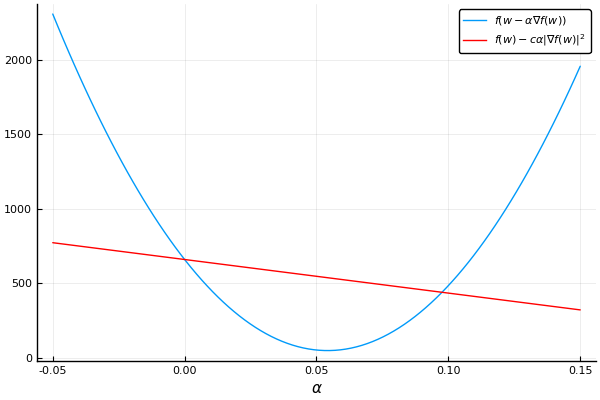

In [8]:
# function decreases fastest in the -∇f(w) direction
Random.seed!(1)

w = 5*ones(d)
g = ∇f(w)
c = .1
alphas = .05*LinRange(-1,3,100)
plot(alphas, [f(w - alpha*g) for alpha in alphas], label = L"f(w - \alpha \nabla f(w))")
plot!(alphas, [f(w) - c*alpha*norm(g)^2 for alpha in alphas],color=:red, label=L"f(w) - c\alpha \|\nabla f(w)\|^2")
xlabel!(L"\alpha")


# Gradient descent with linesearch

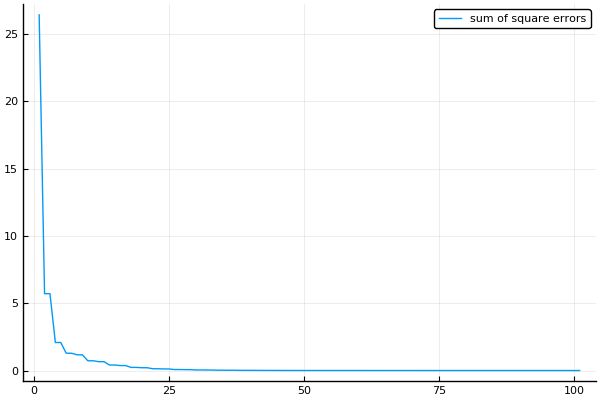

In [14]:
"""This function implements gradient descent with linesearch for the function f with gradient ∇f"""
function gradient_descent_linesearch(f, ∇f;
            alpha = 1,      # initial step size - try other values!
            w = randn(d),     # start at a random w
            maxiters = 100,   # maximum number of iterations 
            c = .01            # Armijo sufficient decrease
            )

    fks = Float64[]  # a list to record all the values f(w) we see
    fw = f(w)
    push!(fks, fw) # record the initial value
    g = ∇f(w)
    alpha0 = copy(alpha)

    # start descending!
    for k=1:maxiters
        w_new = w - alpha*g      # take a gradient step
        fw_new = f(w_new)
        while fw_new > fw - c*alpha*norm(g)^2
            alpha /= 2
            w_new = w - alpha*g      # take a gradient step
            fw_new = f(w_new)
        end
        w, fw, g = w_new, fw_new, ∇f(w)
        alpha = alpha0
        push!(fks, fw) 
    end
    return w, fks
end

w, fks = gradient_descent_linesearch(f, ∇f, alpha = 1, c = .1)

plot(fks, label="sum of square errors")
# plot(fks, label="sum of square errors", yscale = :log10)
# plot(fks, label="sum of square errors", yscale = :log10, xscale = :log10)